In [3]:
import os
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt

#data = pd.read_csv("/Users/evilfantasies/workspace/AI_Linear_Regression/test/data.csv")

#data

In [4]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [310]:
df2 = data.copy()

In [311]:
# df2.apply(lambda x: pd.to_numeric(x, downcast='float'))
df2 = df2.astype(float)
df2[:5]

,zip_code,1998,2001,2004,2005,2006,2007,2010,2011,2012,2013,2014
0,20601.0,433388.0,528943.0,612853.0,645439.0,668446.0,703397.0,758051.0,768656.0,781967.0,787861.0,811719.0
1,20602.0,348017.0,397740.0,462102.0,475835.0,509938.0,547553.0,639590.0,667192.0,686028.0,695227.0,725015.0
2,20603.0,431102.0,563126.0,661844.0,702277.0,757255.0,819105.0,959395.0,988711.0,1013756.0,1044704.0,1075789.0
3,20606.0,6121.0,6872.0,7591.0,8517.0,7867.0,8675.0,9375.0,9799.0,9224.0,9282.0,9252.0
4,20607.0,165562.0,207530.0,283660.0,301893.0,315711.0,346189.0,411954.0,434862.0,448623.0,460857.0,477009.0


In [312]:
df2.columns

Index(['zip_code', '1998', '2001', '2004', '2005', '2006', '2007', '2010',
       '2011', '2012', '2013', '2014'],
      dtype='object')

In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [314]:
classifier = le.fit_transform(df2['1998'])

In [315]:
le.inverse_transform([0,1,2,3,4,5,6,7,8,9,10])

array([ 3566.,  3992.,  4855.,  5099.,  5290.,  5908.,  5961.,  6014.,
        6070.,  6121.,  6145.])

In [316]:
dt = DecisionTreeClassifier()

In [317]:
dt.fit(df2.values, classifier)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [7]:
from IPython.display import Image

In [319]:
dt = DecisionTreeClassifier()

In [320]:
dt.fit(df2.values, classifier)
with open("dt.dot", 'w') as f:
    export_graphviz(dt, out_file=f, feature_names=df2.columns)

In [321]:
os.system('dot -Tpng dt.dot -o dt.png')

1

In [322]:
#Image(filename='dt.png')

In [323]:
#graph is too large! It overfitted to the data and was unable to create something useful


In [324]:
dt = DecisionTreeClassifier(max_depth = 100)

In [325]:
dt.fit(df2.values, classifier)
with open("dt.dot", 'w') as f:
    export_graphviz(dt, out_file=f, feature_names=df2.columns)

In [326]:
# part 2

data2 = pd.read_csv("/Users/evilfantasies/workspace/AI_Linear_Regression/test/data.csv")

In [327]:
data2[:5]

,zip_code,1998,2001,2004,2005,2006,2007,2010,2011,2012,2013,2014
0,20601,433388,528943,612853,645439,668446,703397,758051,768656,781967,787861,811719
1,20602,348017,397740,462102,475835,509938,547553,639590,667192,686028,695227,725015
2,20603,431102,563126,661844,702277,757255,819105,959395,988711,1013756,1044704,1075789
3,20606,6121,6872,7591,8517,7867,8675,9375,9799,9224,9282,9252
4,20607,165562,207530,283660,301893,315711,346189,411954,434862,448623,460857,477009


In [328]:
data2["mns_sqrt_root"] =  (data["1998"])**2 + (data["2001"])**2 + (data["2004"])**2 + (data["2005"])**2+ (data["2006"])**2 + (data["2007"])**2 + (data["2010"])**2  + (data["2011"])**2 + (data["2012"])**2 + (data["2013"])**2 + (data["2014"])**2     

In [8]:
import math
#data2["mns_sqrt_root"] = data2["mns_sqrt_root"].apply(lambda s: math.sqrt(s))

In [330]:
data2.head(5)

,zip_code,1998,2001,2004,2005,2006,2007,2010,2011,2012,2013,2014,mns_sqrt_root
0,20601,433388,528943,612853,645439,668446,703397,758051,768656,781967,787861,811719,2.293018e+06
1,20602,348017,397740,462102,475835,509938,547553,639590,667192,686028,695227,725015,1.900780e+06
2,20603,431102,563126,661844,702277,757255,819105,959395,988711,1013756,1044704,1075789,2.802316e+06
3,20606,6121,6872,7591,8517,7867,8675,9375,9799,9224,9282,9252,2.815577e+04
4,20607,165562,207530,283660,301893,315711,346189,411954,434862,448623,460857,477009,1.208968e+06


In [331]:
data2 = data2.astype(float)

In [332]:
data2[400:]

,zip_code,1998,2001,2004,2005,2006,2007,2010,2011,2012,2013,2014,mns_sqrt_root
400,21919.0,46187.0,56785.0,64088.0,69661.0,76522.0,88312.0,75672.0,76440.0,79223.0,81639.0,81703.0,2.432247e+05
401,21921.0,640150.0,773832.0,875181.0,939406.0,967131.0,1051158.0,1045134.0,1054146.0,1089598.0,1104261.0,1143301.0,3.258004e+06


In [333]:
classifier = le.fit_transform(data2['mns_sqrt_root'])

In [334]:
le.inverse_transform(range(0,402))

array([  1.50342227e+04,   1.71486614e+04,   1.97334504e+04,
         2.28313426e+04,   2.51363143e+04,   2.71268971e+04,
         2.75395737e+04,   2.76379502e+04,   2.78449904e+04,
         2.81557656e+04,   2.89100422e+04,   2.91850905e+04,
         2.92443048e+04,   3.08063887e+04,   3.08929667e+04,
         3.12778448e+04,   3.25920623e+04,   3.31278074e+04,
         3.55086336e+04,   3.77157122e+04,   3.78177682e+04,
         3.87880445e+04,   3.99296899e+04,   4.25809523e+04,
         4.32025875e+04,   4.51453998e+04,   4.56417936e+04,
         4.64948003e+04,   5.30704543e+04,   5.37311081e+04,
         5.41454276e+04,   5.57507985e+04,   6.11313028e+04,
         6.18402014e+04,   6.42151416e+04,   6.49541436e+04,
         6.57623280e+04,   6.82783839e+04,   6.90374510e+04,
         6.91832209e+04,   6.98882339e+04,   7.00130621e+04,
         7.13537877e+04,   7.13731154e+04,   7.14954335e+04,
         7.18078281e+04,   7.62425992e+04,   7.86208136e+04,
         7.95960088e+04,

In [335]:
dt = DecisionTreeClassifier(max_depth = 20)

In [336]:
dt.fit(data2.values, classifier)
with open("dt.dot", 'w') as f:
    export_graphviz(dt, out_file=f, feature_names=data2.columns)

In [337]:
# Part 3

In [343]:
data3 = pd.read_csv("/Users/evilfantasies/Desktop/flipped_data.csv")

In [344]:
data3.head()

,zip_code,Totals,20601,20602,20603,20606,20607,20608,20609,20611,...,21901,21903,21904,21911,21912,21915,21917,21918,21919,21921
0,1998,116614285,433388,348017,431102,6121,165562,15968,18323,21718,...,215434,84648,99259,149118,23015,71780,36221,69035,46187,640150
1,2001,136235786,528943,397740,563126,6872,207530,18336,22617,26359,...,251219,102271,117749,176519,27392,75753,33800,77816,56785,773832
2,2004,155654521,612853,462102,661844,7591,283660,21330,23921,34491,...,314117,123299,152562,220517,37059,87693,59940,88761,64088,875181
3,2005,166297995,645439,475835,702277,8517,301893,21669,25532,36202,...,342824,135588,157865,243914,42313,87578,62720,93859,69661,939406
4,2006,177136975,668446,509938,757255,7867,315711,25159,28695,31797,...,369880,139014,166892,251592,35374,100443,65356,95941,76522,967131


In [346]:
data3 = data3.drop('zip_code',1)

In [347]:
data3 = data3.astype(float)

In [350]:
classifier = le.fit_transform(data3['Totals'])

In [352]:
le.inverse_transform(range(0,11))

array([  1.16614285e+08,   1.36235786e+08,   1.55654521e+08,
         1.66297995e+08,   1.77136975e+08,   1.89470912e+08,
         1.90616115e+08,   1.96896143e+08,   2.05257793e+08,
         2.05576901e+08,   2.14772916e+08])

In [353]:
dt = DecisionTreeClassifier()

In [354]:
dt.fit(data3.values, classifier)
with open("dt.dot", 'w') as f:
    export_graphviz(dt, out_file=f, feature_names=data3.columns)

In [9]:
df = pd.read_csv("Better_14zp21md_cleaned.csv")

In [11]:
df = df.drop("Unnamed: 0",1)


In [12]:
df


,ZIP_code,Size_of_adjusted_gross_income,Number_of_returns,Number_of_single_returns,Number_of_joint_returns,Number_of_head_of_household_returns,Number_with_paid_preparer's_signature,Number_of_exemptions,Number_of_dependents,Total_Number_of_volunteer_prepared_returns,...,Total_tax_liability_Number_of_returns,Total_tax_liability_Amount,Additional_Medicare_tax_Number_of_returns,Additional_Medicare_tax_Amount,Net_investment_income_tax_Number_of_returns,Net_investment_income_tax_Amount,Tax_due_at_time_of_filing_Number_of_returns,Tax_due_at_time_of_filing_Amount,Overpayments_refunded_Number_of_returns,Overpayments_refunded_Amount
0,0.0,USD1_under_USD25000,958870,681730,81200,176860,461690,1284810,411630,31180,...,488070,415331,0,0,0,0,133020,89745,763330,1480561
1,0.0,USD25000_under_USD50000,637910,344850,117450,149990,310930,1160030,407830,16520,...,530050,1393015,0,0,0,0,93110,144059,535880,1361793
2,0.0,USD50000_under_USD75000,407040,190490,129840,67800,210450,776290,239640,5340,...,390170,2199521,0,0,0,0,86780,184399,313110,899660
3,0.0,USD75000_under_USD100000,279590,92220,143190,33620,147380,608200,185440,2060,...,275980,2475750,30,1,0,0,67520,180646,205870,715312
4,0.0,USD100000_under_USD200000,460200,76110,349480,25630,238920,1208510,398850,1440,...,458330,8096121,4160,926,1720,366,155450,622259,289860,1225552
5,0.0,USD200000_or_more,160700,12690,143220,3480,102140,472660,168670,100,...,160600,15803602,74410,137789,82070,273468,82770,1541883,57710,733429
6,20601.0,USD1_under_USD25000,3750,2780,250,640,1610,4790,1540,70,...,1730,1333,0,0,0,0,360,251,3200,5850
7,20601.0,USD25000_under_USD50000,2560,1270,460,710,1230,4870,1860,80,...,2040,5134,0,0,0,0,320,509,2230,6087
8,20601.0,USD50000_under_USD75000,1890,780,500,480,970,3750,1360,-99,...,1800,9157,0,0,0,0,360,743,1530,4699
9,20601.0,USD75000_under_USD100000,1510,480,650,290,800,3240,1080,-99,...,1490,12792,0,0,0,0,340,823,1150,3934


In [21]:
df = pd.read_csv("flipped_data.csv")

In [14]:
df

,zip_code,Totals,20601,20602,20603,20606,20607,20608,20609,20611,...,21901,21903,21904,21911,21912,21915,21917,21918,21919,21921
0,1998,116614285,433388,348017,431102,6121,165562,15968,18323,21718,...,215434,84648,99259,149118,23015,71780,36221,69035,46187,640150
1,2001,136235786,528943,397740,563126,6872,207530,18336,22617,26359,...,251219,102271,117749,176519,27392,75753,33800,77816,56785,773832
2,2004,155654521,612853,462102,661844,7591,283660,21330,23921,34491,...,314117,123299,152562,220517,37059,87693,59940,88761,64088,875181
3,2005,166297995,645439,475835,702277,8517,301893,21669,25532,36202,...,342824,135588,157865,243914,42313,87578,62720,93859,69661,939406
4,2006,177136975,668446,509938,757255,7867,315711,25159,28695,31797,...,369880,139014,166892,251592,35374,100443,65356,95941,76522,967131
5,2007,190616115,703397,547553,819105,8675,346189,26349,31472,33469,...,395251,156814,172198,274608,38670,106057,69265,103867,88312,1051158
6,2010,189470912,758051,639590,959395,9375,411954,26895,33827,35928,...,415050,155820,182151,271204,36542,110642,69401,106972,75672,1045134
7,2011,196896143,768656,667192,988711,9799,434862,26729,32964,36699,...,433326,158862,188624,275816,41977,110810,69635,110540,76440,1054146
8,2012,205576901,781967,686028,1013756,9224,448623,27064,34493,36236,...,453189,158322,191063,280642,38910,113866,72294,112817,79223,1089598
9,2013,205257793,787861,695227,1044704,9282,460857,26294,33481,33992,...,459836,157822,192986,277730,37537,117779,72187,112574,81639,1104261


In [22]:
df = df.drop("zip_code",1)
df = df.drop("Totals",1)

In [17]:
df = df.drop("Totals",1)

In [25]:
df

,Totals,20601,20602,20603,20606,20607,20608,20609,20611,20613,...,21901,21903,21904,21911,21912,21915,21917,21918,21919,21921
0,116614285,433388,348017,431102,6121,165562,15968,18323,21718,170758,...,215434,84648,99259,149118,23015,71780,36221,69035,46187,640150
1,136235786,528943,397740,563126,6872,207530,18336,22617,26359,208618,...,251219,102271,117749,176519,27392,75753,33800,77816,56785,773832
2,155654521,612853,462102,661844,7591,283660,21330,23921,34491,288261,...,314117,123299,152562,220517,37059,87693,59940,88761,64088,875181
3,166297995,645439,475835,702277,8517,301893,21669,25532,36202,316151,...,342824,135588,157865,243914,42313,87578,62720,93859,69661,939406
4,177136975,668446,509938,757255,7867,315711,25159,28695,31797,345948,...,369880,139014,166892,251592,35374,100443,65356,95941,76522,967131
5,190616115,703397,547553,819105,8675,346189,26349,31472,33469,371622,...,395251,156814,172198,274608,38670,106057,69265,103867,88312,1051158
6,189470912,758051,639590,959395,9375,411954,26895,33827,35928,448973,...,415050,155820,182151,271204,36542,110642,69401,106972,75672,1045134
7,196896143,768656,667192,988711,9799,434862,26729,32964,36699,475215,...,433326,158862,188624,275816,41977,110810,69635,110540,76440,1054146
8,205576901,781967,686028,1013756,9224,448623,27064,34493,36236,487616,...,453189,158322,191063,280642,38910,113866,72294,112817,79223,1089598
9,205257793,787861,695227,1044704,9282,460857,26294,33481,33992,501550,...,459836,157822,192986,277730,37537,117779,72187,112574,81639,1104261


In [26]:
df2 = df.copy()

In [24]:
df2.pct_change(periods=3)

,Totals,20601,20602,20603,20606,20607,20608,20609,20611,20613,...,21901,21903,21904,21911,21912,21915,21917,21918,21919,21921
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.426052,0.489287,0.367275,0.629027,0.391439,0.823444,0.357027,0.393440,0.666912,0.851456,...,0.591318,0.601786,0.590435,0.635711,0.838497,0.220089,0.731592,0.359586,0.508238,0.467478
4,0.300224,0.263739,0.282089,0.344735,0.144790,0.521279,0.372110,0.268736,0.206305,0.658285,...,0.472341,0.359271,0.417354,0.425297,0.291399,0.325928,0.933609,0.232921,0.347574,0.249795
5,0.224610,0.147742,0.184918,0.237610,0.142801,0.220436,0.235302,0.315664,-0.029631,0.289186,...,0.258292,0.271819,0.128708,0.245292,0.043471,0.209412,0.155572,0.170187,0.377980,0.201075
6,0.139346,0.174473,0.344142,0.366120,0.100740,0.364570,0.241174,0.324886,-0.007569,0.420122,...,0.210680,0.149217,0.153840,0.111884,-0.136388,0.263354,0.106521,0.139710,0.086289,0.112548
7,0.111547,0.149915,0.308379,0.305651,0.245583,0.377405,0.062403,0.148772,0.154165,0.373660,...,0.171531,0.142777,0.130216,0.096283,0.186663,0.103213,0.065472,0.152166,-0.001072,0.089972
8,0.078486,0.111701,0.252898,0.237639,0.063285,0.295890,0.027136,0.095990,0.082674,0.312129,...,0.146585,0.009616,0.109554,0.021973,0.006206,0.073630,0.043731,0.086168,-0.102919,0.036569
9,0.083321,0.039325,0.086989,0.088920,-0.009920,0.118710,-0.022346,-0.010229,-0.053886,0.117105,...,0.107905,0.012848,0.059484,0.024063,0.027229,0.064505,0.040144,0.052369,0.078853,0.056574


In [27]:
df2

,Totals,20601,20602,20603,20606,20607,20608,20609,20611,20613,...,21901,21903,21904,21911,21912,21915,21917,21918,21919,21921
0,116614285,433388,348017,431102,6121,165562,15968,18323,21718,170758,...,215434,84648,99259,149118,23015,71780,36221,69035,46187,640150
1,136235786,528943,397740,563126,6872,207530,18336,22617,26359,208618,...,251219,102271,117749,176519,27392,75753,33800,77816,56785,773832
2,155654521,612853,462102,661844,7591,283660,21330,23921,34491,288261,...,314117,123299,152562,220517,37059,87693,59940,88761,64088,875181
3,166297995,645439,475835,702277,8517,301893,21669,25532,36202,316151,...,342824,135588,157865,243914,42313,87578,62720,93859,69661,939406
4,177136975,668446,509938,757255,7867,315711,25159,28695,31797,345948,...,369880,139014,166892,251592,35374,100443,65356,95941,76522,967131
5,190616115,703397,547553,819105,8675,346189,26349,31472,33469,371622,...,395251,156814,172198,274608,38670,106057,69265,103867,88312,1051158
6,189470912,758051,639590,959395,9375,411954,26895,33827,35928,448973,...,415050,155820,182151,271204,36542,110642,69401,106972,75672,1045134
7,196896143,768656,667192,988711,9799,434862,26729,32964,36699,475215,...,433326,158862,188624,275816,41977,110810,69635,110540,76440,1054146
8,205576901,781967,686028,1013756,9224,448623,27064,34493,36236,487616,...,453189,158322,191063,280642,38910,113866,72294,112817,79223,1089598
9,205257793,787861,695227,1044704,9282,460857,26294,33481,33992,501550,...,459836,157822,192986,277730,37537,117779,72187,112574,81639,1104261


In [42]:
data = np.matrix( np.asarray( df2 ) )

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
lr = LinearRegression()

In [45]:
 X, y = data[:, 1:], data[:, 0]

In [46]:
lr.fit(X, y)
LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
from array import array

In [49]:
lr.coef_array([  4.01182386e-01,   3.51587361e-04])

AttributeError: 'LinearRegression' object has no attribute 'coef_array'

In [50]:
df = pd.read_csv("flipped_data.csv")
df = df.drop("zip_code",1)
#df = df.drop("Totals",1)

In [51]:
df


,Totals,20601,20602,20603,20606,20607,20608,20609,20611,20613,...,21901,21903,21904,21911,21912,21915,21917,21918,21919,21921
0,116614285,433388,348017,431102,6121,165562,15968,18323,21718,170758,...,215434,84648,99259,149118,23015,71780,36221,69035,46187,640150
1,136235786,528943,397740,563126,6872,207530,18336,22617,26359,208618,...,251219,102271,117749,176519,27392,75753,33800,77816,56785,773832
2,155654521,612853,462102,661844,7591,283660,21330,23921,34491,288261,...,314117,123299,152562,220517,37059,87693,59940,88761,64088,875181
3,166297995,645439,475835,702277,8517,301893,21669,25532,36202,316151,...,342824,135588,157865,243914,42313,87578,62720,93859,69661,939406
4,177136975,668446,509938,757255,7867,315711,25159,28695,31797,345948,...,369880,139014,166892,251592,35374,100443,65356,95941,76522,967131
5,190616115,703397,547553,819105,8675,346189,26349,31472,33469,371622,...,395251,156814,172198,274608,38670,106057,69265,103867,88312,1051158
6,189470912,758051,639590,959395,9375,411954,26895,33827,35928,448973,...,415050,155820,182151,271204,36542,110642,69401,106972,75672,1045134
7,196896143,768656,667192,988711,9799,434862,26729,32964,36699,475215,...,433326,158862,188624,275816,41977,110810,69635,110540,76440,1054146
8,205576901,781967,686028,1013756,9224,448623,27064,34493,36236,487616,...,453189,158322,191063,280642,38910,113866,72294,112817,79223,1089598
9,205257793,787861,695227,1044704,9282,460857,26294,33481,33992,501550,...,459836,157822,192986,277730,37537,117779,72187,112574,81639,1104261


In [52]:
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.distributions.mixture_rvs import mixture_rvs

In [64]:
np.random.seed(12345)

In [95]:
mixture_rvs([.25,.75], size=11, dist=[stats.norm, stats.norm],
               kwargs = (dict(loc=-1,scale=.5),dict(loc=1,scale=.5)))

array([ 1.01694321,  0.71521856,  0.97081405, -0.50141238,  1.30732355,
        0.24396442,  0.97357948,  0.36099321,  0.16623531, -0.70942228,
       -0.41537769])

In [85]:
obs_dist1 = mixture_rvs([.25,.75], size=10000, dist=[stats.norm, stats.norm],
               kwargs = (dict(loc=-1,scale=.5),dict(loc=1,scale=.5)))
df.astype(float)
data = np.asarray( df2['Totals'] ) 

In [87]:
data #= data.astype(float)

array([  1.16614285e+08,   1.36235786e+08,   1.55654521e+08,
         1.66297995e+08,   1.77136975e+08,   1.90616115e+08,
         1.89470912e+08,   1.96896143e+08,   2.05576901e+08,
         2.05257793e+08,   2.14772916e+08])

In [91]:
obs_dist1

array([-0.8650213 ,  0.00860918, -1.1012373 , ..., -0.94724812,
       -1.13270231,  1.1998566 ])

In [88]:
kde = sm.nonparametric.KDEUnivariate(data)
kde.fit()

/Users/romeo/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


In [89]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.hist(obs_dist1, bins=50, normed=True, color='red')
ax.plot(kde.support, kde.density, lw=2, color='black');


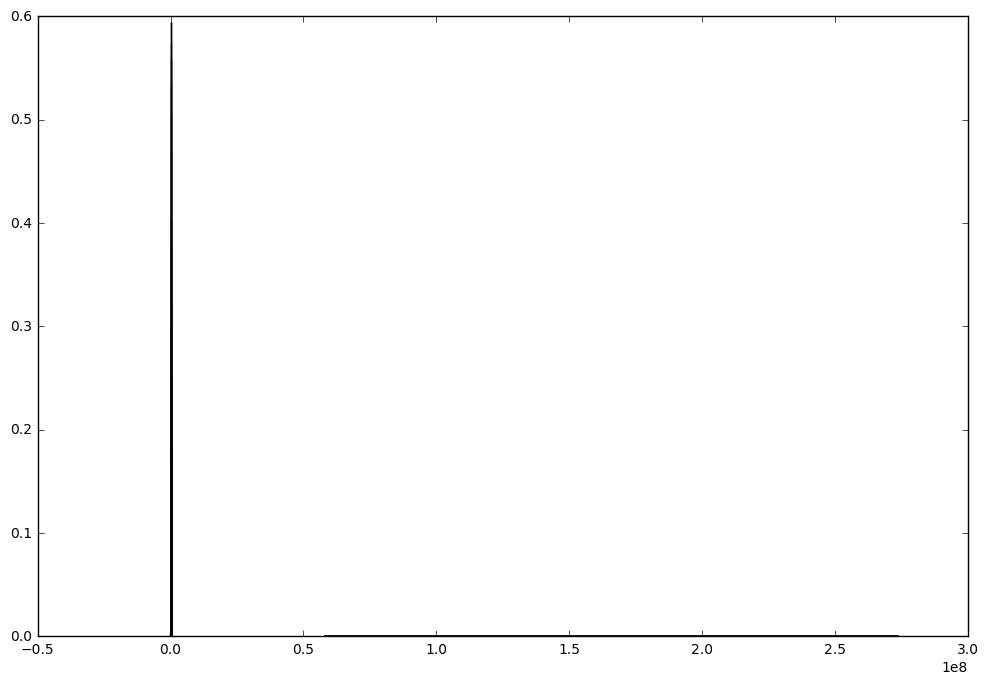

In [90]:
fig

In [96]:
from pandas.io.data import DataReader

/Users/romeo/anaconda/lib/python3.5/site-packages/pandas/io/data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [99]:
symbols = ['MSFT', 'GOOG', 'AAPL']
data = dict((sym, DataReader(sym, "yahoo"))
            for sym in symbols)

In [100]:
panel = Panel(data).swapaxes('items', 'minor')

NameError: name 'Panel' is not defined